## ANN Tutorial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\DS\\DL\\ANN\\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop_duplicates()
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#spliting dependent and independent variables
X=df.iloc[:,3:13]
y=df.iloc[:,-1]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
X["Gender"]=df["Gender"].replace(["Female","Male"],[0,1])
X["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
X["Geography"] = encoder.fit_transform(X["Geography"])
X["Geography"]

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32

In [14]:
X["Geography"].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()

X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [17]:
import keras
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential()


In [19]:
## Creating input layer
classifier.add(Dense(units=10,activation="relu"))

In [20]:
## Creating hidden layer
classifier.add(Dense(units=5,activation="relu"))

In [21]:
## Output Layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [22]:
#Compiling
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
## Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [24]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5686 - accuracy: 0.7619 - val_loss: 0.5071 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.7960 - val_loss: 0.4630 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4374 - accuracy: 0.8020 - val_loss: 0.4485 - val_accuracy: 0.8054
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4244 - accuracy: 0.8123 - val_loss: 0.4389 - val_accuracy: 0.8122
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8182 - val_loss: 0.4267 - val_accuracy: 0.8217
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy: 0.8287 - val_loss: 0.4154 - val_accuracy: 0.8307
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3875 - accuracy: 0.8350 - val_loss: 0.4077 - val_accuracy: 0.8262

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

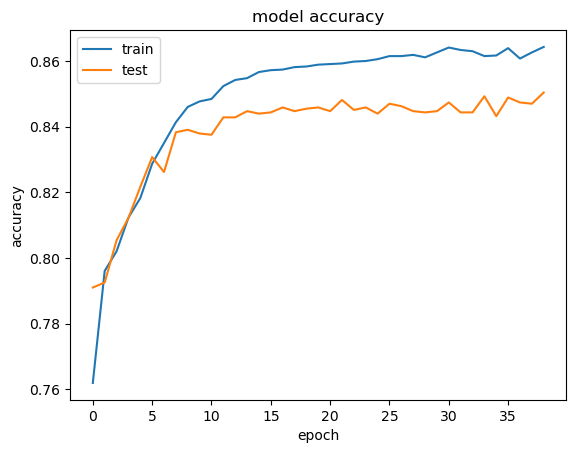

In [26]:
## summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

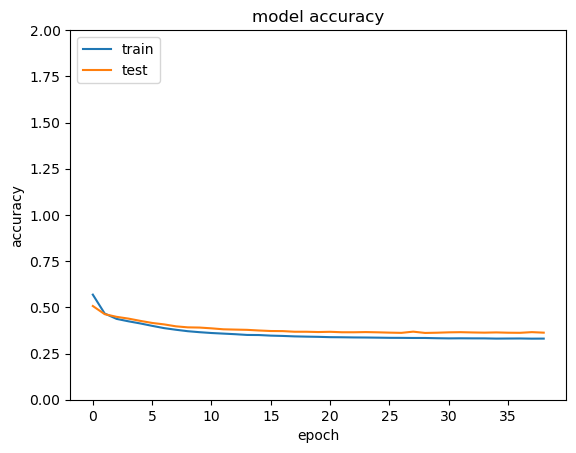

In [33]:
## summarize history for accuracy
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylim(0,2)
plt.ylabel("accuracy")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [34]:
# Predicting
y_pred=classifier.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [35]:
y_pred=(y_pred>=0.5)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1534,   73],
       [ 219,  174]], dtype=int64)

In [37]:
acc_score=accuracy_score(y_test,y_pred)
acc_score=acc_score*100
acc_score

85.39999999999999

In [38]:
## get weights
classifier.get_weights()

[array([[ 8.20150319e-03, -3.52623798e-02,  2.22923055e-01,
         -6.06170185e-02,  7.52959307e-03, -3.72003131e-02,
         -7.04503059e-02,  8.67251009e-02,  1.54955715e-01,
         -4.12857682e-01],
        [ 2.02479362e-02, -8.38024795e-01,  3.89408708e-01,
         -5.63858271e-01,  1.00538298e-01, -1.66683093e-01,
          1.79613948e-01,  5.63074350e-01, -4.76683527e-01,
          5.27740791e-02],
        [-1.03631735e-01,  9.67985764e-02, -3.75037491e-01,
          6.24320149e-01,  1.02734041e+00,  2.38382444e-02,
         -4.25110489e-01,  2.35187069e-01, -2.76784748e-01,
          7.00881779e-01],
        [ 2.91149467e-01,  6.99405149e-02,  2.40548044e-01,
          6.06163859e-01, -6.72507346e-01, -5.85029321e-03,
         -7.04758406e-01,  9.46307957e-01, -5.98736823e-01,
         -1.01689912e-01],
        [-1.00100569e-01,  3.71890478e-02,  1.47058323e-01,
          1.57602295e-01,  1.42963519e-02,  1.43202674e-03,
         -2.11116970e-02,  3.10739782e-03, -2.524436